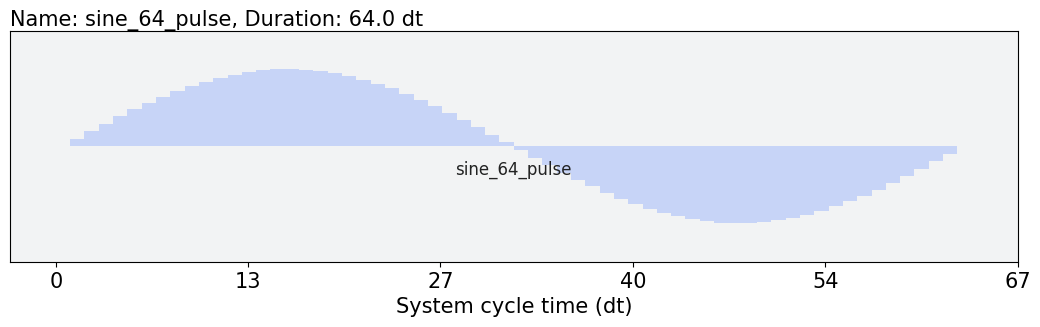

In [2]:
# PURPOSE:
# This example defines a custom waveform using a sine function and visualizes it
# using Qiskit's built-in waveform plotting tool.
#----------------------------------------------------------------------------------
import numpy as np
from qiskit.pulse.library import Waveform
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate sine wave samples
# -------------------------------
x = np.linspace(0, 2 * np.pi, 64)      # 64 time steps over one full sine cycle
data = np.sin(x)                       # Sine values at each point

# -------------------------------
# Step 2: Create waveform object
# -------------------------------
waveform = Waveform(data, name="sine_64_pulse")

# -------------------------------
# Step 3: Visualize the waveform
# -------------------------------
waveform.draw()


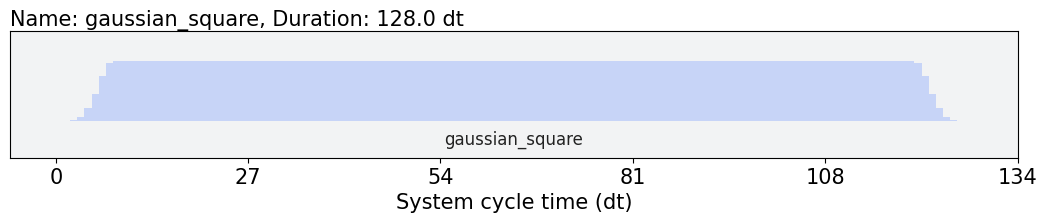

In [3]:
# PURPOSE:
# This example demonstrates how to create and visualize a Gaussian Square pulse
# using Qiskit's pulse library. The pulse shape is smooth on the edges and flat
# in the middle — useful for clean qubit rotations.

from qiskit.pulse.library import GaussianSquare
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Define Gaussian Square pulse parameters
# -------------------------------
duration = 128        # Total number of time steps (dt)
amp = 1.0             # Peak amplitude
sigma = 2             # Width of the Gaussian rise/fall (edges)
width = 112           # Width of the flat top part
name = "gaussian_square"

# -------------------------------
# Step 2: Create the pulse
# -------------------------------
gaussian_square_pulse = GaussianSquare(duration, amp, sigma, width, name=name)

# -------------------------------
# Step 3: Visualize the pulse
# -------------------------------
gaussian_square_pulse.draw()


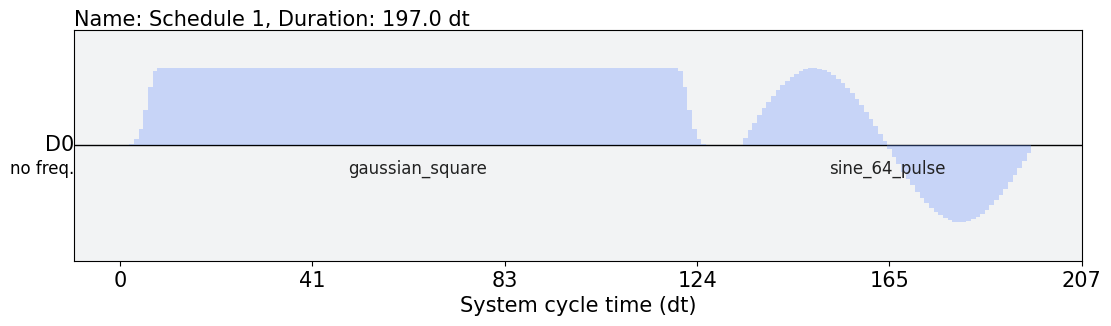

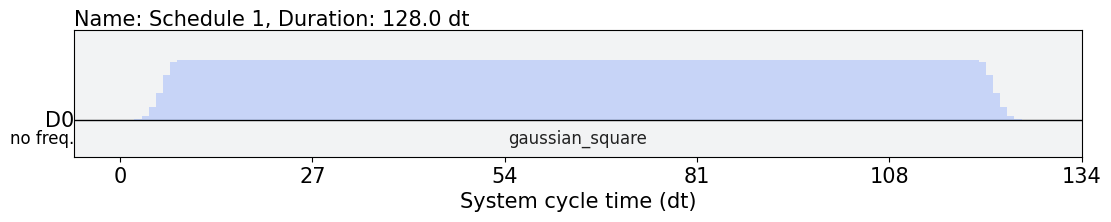

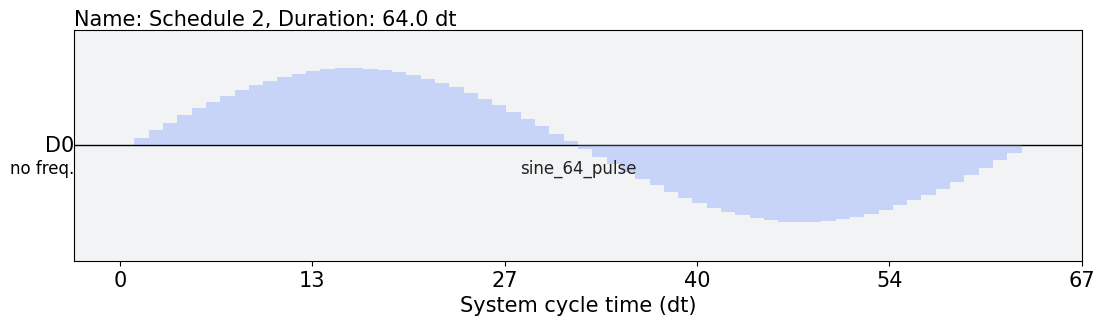

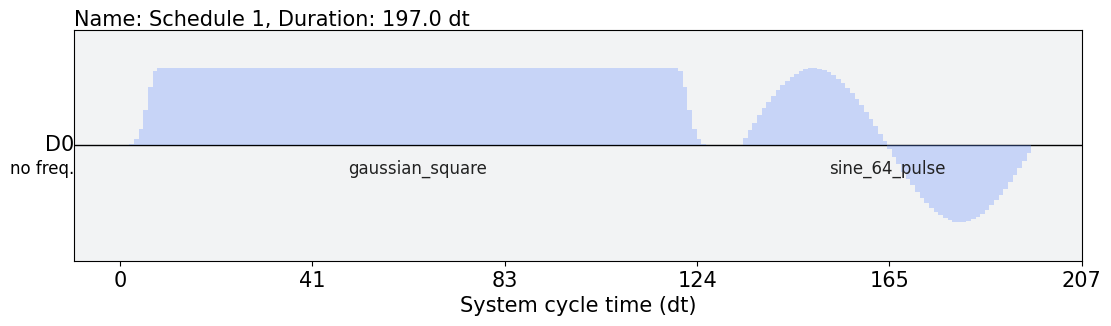

In [4]:
# ---------------------------------------------------------------
# Pulse Schedule Practice — Executing Instructions in Sequence
# ---------------------------------------------------------------

from qiskit.pulse import Schedule, Play, DriveChannel 
from qiskit.pulse.library import GaussianSquare, Waveform
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Schedule: timeline container for pulse instructions, 
# Play: instruction that plays a pulse on a channel
# DriveChannel(0): the physical control line for qubit 0
# GaussianSquare and Waveform: two types of pulses
# numpy and matplotlib: used to generate sine data and plot timelines
#-----------------------------------------------------------
# Enable inline plots
%matplotlib inline

# -------------------------------
# Step 1: Create a Gaussian square pulse
# -------------------------------
gaussian_square_pulse = GaussianSquare(duration=128, amp=1.0, sigma=2, width=112, name="gaussian_square")
# Flat-top pulse with Gaussian rise and fall

# -------------------------------
# Step 2: Create a sine waveform pulse (64 samples)
# -------------------------------
x = np.linspace(0, 2 * np.pi, 64)
sine_data = np.sin(x)
sine_waveform = Waveform(sine_data, name="sine_64_pulse")

# -------------------------------
# Step 3: Create two schedules
# -------------------------------

# Schedule 1 — Gaussian square pulse
schedule_1 = Schedule(name='Schedule 1')
schedule_1 = schedule_1.insert(0, Play(gaussian_square_pulse, DriveChannel(0))) # insert(0, ...): places the pulse at time 0
schedule_1.draw() # schedule.draw(): Timeline visualization                     # DriveChannel(0): Targets qubit 0 with control pulses

# Schedule 2 — Sine pulse
schedule_2 = Schedule(name='Schedule 2')
schedule_2 = schedule_2.insert(0, Play(sine_waveform, DriveChannel(0)))
schedule_2.draw()

# -------------------------------
# Step 4: Combine with time shift
# -------------------------------

# Total duration of schedule_1 is 128
# Insert schedule_2 5 dt after that: time = 133
schedule_3 = schedule_1.insert(schedule_1.duration + 5, schedule_2)
schedule_3.draw()


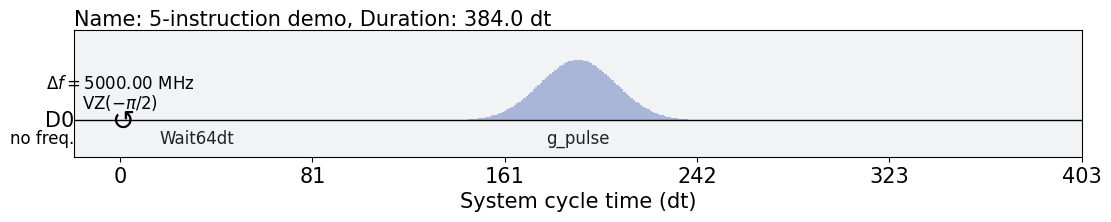

In [4]:
# ------------------------------------------------------------------------------
# PURPOSE:
# This Qiskit Pulse example demonstrates how to build a basic pulse schedule
# using 5 fundamental low-level pulse instructions:
#   1. SetFrequency      - tune the drive channel to a specific frequency
#   2. ShiftPhase        - apply a phase shift to the channel
#   3. Delay             - wait for a specified amount of time
#   4. Play              - play a shaped microwave pulse (Gaussian)
#   5. Acquire           - trigger qubit measurement into classical memory
# ------------------------------------------------------------------------------

from qiskit.pulse import Schedule, DriveChannel, AcquireChannel, MemorySlot
from qiskit.pulse import Play, Delay, SetFrequency, ShiftPhase, Acquire
from qiskit.pulse.library import Gaussian
import numpy as np

# -----------------------
# Step 1: Setup
# -----------------------

schedule = Schedule(name="5-instruction demo")

d0 = DriveChannel(0)
a0 = AcquireChannel(0)
m0 = MemorySlot(0)

# -----------------------
# Step 2: Create a Gaussian pulse
# -----------------------

gaussian_pulse = Gaussian(duration=128, amp=0.3, sigma=16, name="g_pulse")

# -----------------------
# Step 3: Add instructions
# -----------------------

schedule += SetFrequency(5e9, d0, name="SetFreq")
schedule += ShiftPhase(np.pi / 2, d0, name="ShiftPhase") << schedule.duration
schedule += Delay(64, d0, name="Wait64dt") << schedule.duration
schedule += Play(gaussian_pulse, d0, name="PlayPulse") << schedule.duration
schedule += Acquire(128, a0, m0, name="Acquire") << schedule.duration

# -----------------------
# Step 4: Visualize
# -----------------------

schedule.draw()


Job Status: JobStatus.RUNNING
Job ID: 9ba8c16a-226b-4f6f-8dc1-869a416e099b
Job Result: SamplerResult(quasi_dists=[{0: 0.501953125, 1: 0.498046875}], metadata=[{'shots': 1024}])
Measurement counts: {'0': 0.501953125, '1': 0.498046875}


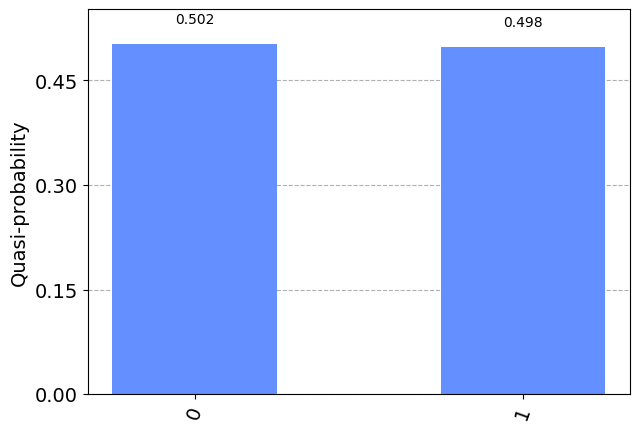

In [5]:
# ------------------------------------------------------------------------------
# PURPOSE:
# This code demonstrates how to use Qiskit's Sampler primitive to:
# - Run a basic quantum circuit
# - Track job execution
# - Extract and visualize measurement results from the Job object
# ------------------------------------------------------------------------------

from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution
import matplotlib.pyplot as plt

# Step 1: Create a simple quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)              # Put qubit in superposition
qc.measure(0, 0)     # Measure qubit

# Step 2: Run the circuit using the Sampler primitive
sampler = Sampler()
job = sampler.run(qc, shots=1024)

# Step 3: Monitor the job status
print("Job Status:", job.status())

# Step 4: Once complete, get job details
print("Job ID:", job.job_id())
result = job.result()
print("Job Result:", result)

# Step 5: Extract and plot results
quasi_dists = result.quasi_dists
counts = quasi_dists[0].binary_probabilities()

print("Measurement counts:", counts)
plot_distribution(counts)
plt.show()
